In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
data = pd.read_csv('../out/study3.csv')
data

,metric,mean,method,i,dataset
0,CCC,0.550256,KF,0,simulated
1,MAE,1.217205,KF,0,simulated
2,R2,0.364502,KF,0,simulated
3,RMSE,1.552162,KF,0,simulated
4,RMSPE,114.475878,KF,0,simulated
...,...,...,...,...,...
15995,RMSE,6.570647,block,499,real
15996,RMSPE,0.134175,block,499,real
15997,RSR,1.070399,block,499,real
15998,r,0.172760,block,499,real


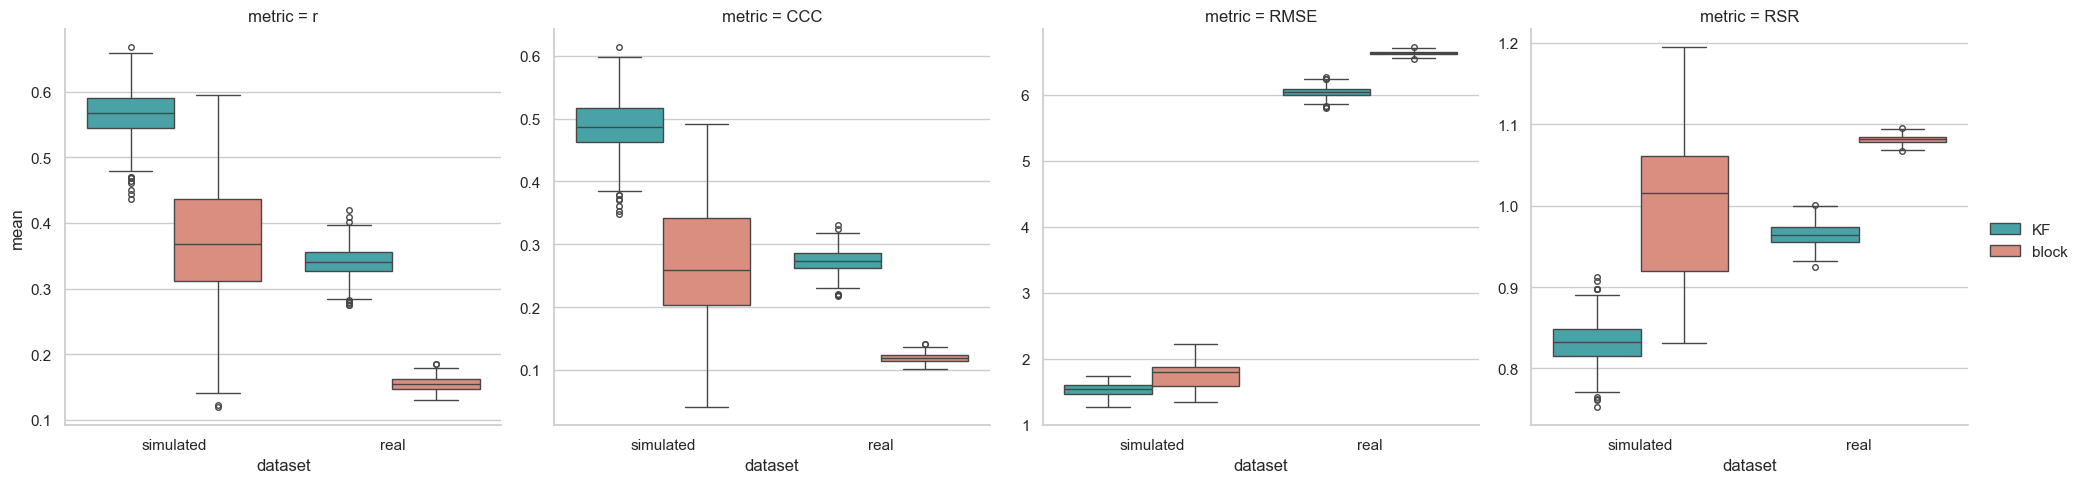

In [33]:
sns.set_theme(style="whitegrid")

palette = ["#39B1B5", "#E88471"]
g = sns.FacetGrid(data,
              col="metric", 
              col_order=["r", "CCC", "RMSE", "RSR"],
              sharey=False,
              height=5,
              palette=palette,)
g.map_dataframe(sns.boxplot, x="dataset", y="mean", 
                fliersize=4,
                hue="method", dodge=True, palette=palette)
g.add_legend()